In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv(r"datos/country_vaccinations.csv", encoding='utf-8')
df2=pd.read_csv(r"datos/country_vaccinations_by_manufacturer.csv", encoding='utf-8')

In [3]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


In [4]:
df2.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31133
4,Austria,2021-01-15,Johnson&Johnson,0


In [7]:
df['date']=pd.to_datetime(df['date'])
df2['date']=pd.to_datetime(df2['date'])

In [17]:
df2.location.value_counts()

European Union    1488
Germany            992
Iceland            988
Latvia             850
Czechia            843
Italy              839
Lithuania          823
France             812
Romania            765
South Korea        748
Chile              677
United States      625
Uruguay            561
Switzerland        506
Hong Kong          384
Japan              225
Hungary            176
Poland             144
Netherlands        140
Finland            140
Spain              136
Belgium            136
Austria            136
Portugal           134
Ireland            130
Slovakia           129
Croatia            128
Bulgaria           119
Luxembourg         118
Estonia            117
Slovenia           114
Cyprus             112
Denmark            107
Malta               99
Sweden              98
Liechtenstein       58
Name: location, dtype: int64

In [18]:
alemania_vacunaciones=df[df['country']=='Germany']
alemania_vacunas=df2[df2['location']=='Germany']

In [38]:
alemania_vacunaciones[['date','total_vaccinations']]

,date,total_vaccinations
13778,2020-12-27,24156.0
13779,2020-12-28,42188.0
13780,2020-12-29,92394.0
13781,2020-12-30,156197.0
13782,2020-12-31,206019.0
...,...,...
14021,2021-08-27,101254781.0
14022,2021-08-28,101386091.0
14023,2021-08-29,101467669.0
14024,2021-08-30,101651787.0


In [25]:
for value in alemania_vacunas['vaccine'].value_counts().index:
    print(value)

Oxford/AstraZeneca
Johnson&Johnson
Moderna
Pfizer/BioNTech


In [28]:
datos_vacunas={}
for value in alemania_vacunas['vaccine'].value_counts().index:
    datos_vacunas[value]=alemania_vacunas[alemania_vacunas['vaccine']==value]

In [29]:
datos_vacunas

{'Oxford/AstraZeneca':      location       date             vaccine  total_vaccinations
 3329  Germany 2020-12-27  Oxford/AstraZeneca                   0
 3333  Germany 2020-12-28  Oxford/AstraZeneca                   0
 3337  Germany 2020-12-29  Oxford/AstraZeneca                   1
 3341  Germany 2020-12-30  Oxford/AstraZeneca                   1
 3345  Germany 2020-12-31  Oxford/AstraZeneca                   1
 ...       ...        ...                 ...                 ...
 4301  Germany 2021-08-27  Oxford/AstraZeneca            12641782
 4305  Germany 2021-08-28  Oxford/AstraZeneca            12642266
 4309  Germany 2021-08-29  Oxford/AstraZeneca            12642413
 4313  Germany 2021-08-30  Oxford/AstraZeneca            12644280
 4317  Germany 2021-08-31  Oxford/AstraZeneca            12645915
 
 [248 rows x 4 columns],
 'Johnson&Johnson':      location       date          vaccine  total_vaccinations
 3327  Germany 2020-12-27  Johnson&Johnson                   0
 3331  Germany

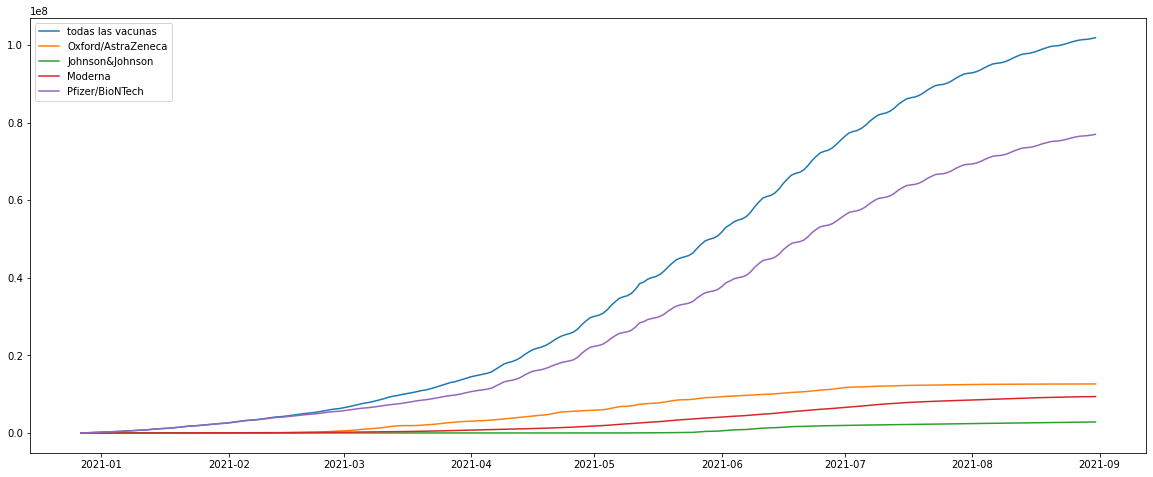

In [43]:
plt.figure(figsize=(20,8))
plt.plot(alemania_vacunaciones['date'], alemania_vacunaciones['total_vaccinations'], label='todas las vacunas')
for key, value in datos_vacunas.items():
    plt.plot(value['date'], value['total_vaccinations'], label = key)
plt.legend()
plt.show()